In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [7]:
data = pd.read_excel("D:/Nptel data sets/hierarchical_clustering.xlsx")
data

,Variable 1,Variable 2
0,2.00,2.0
1,5.50,4.0
2,5.00,5.0
3,1.50,2.5
4,1.00,1.0
5,7.00,5.0
6,5.75,6.5


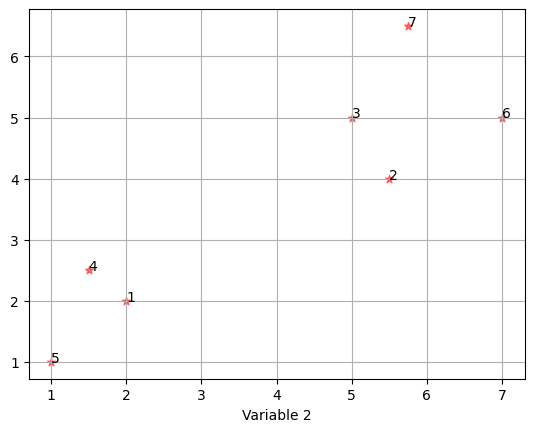

In [12]:
x = data['Variable 1']
y = data['Variable 2']
n = range(1,8)

fig, ax = plt.subplots()
ax.scatter(x,y, marker='*', c='red', alpha=0.5)
plt.grid()
plt.xlabel("Variable 1")
plt.xlabel("Variable 2")
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

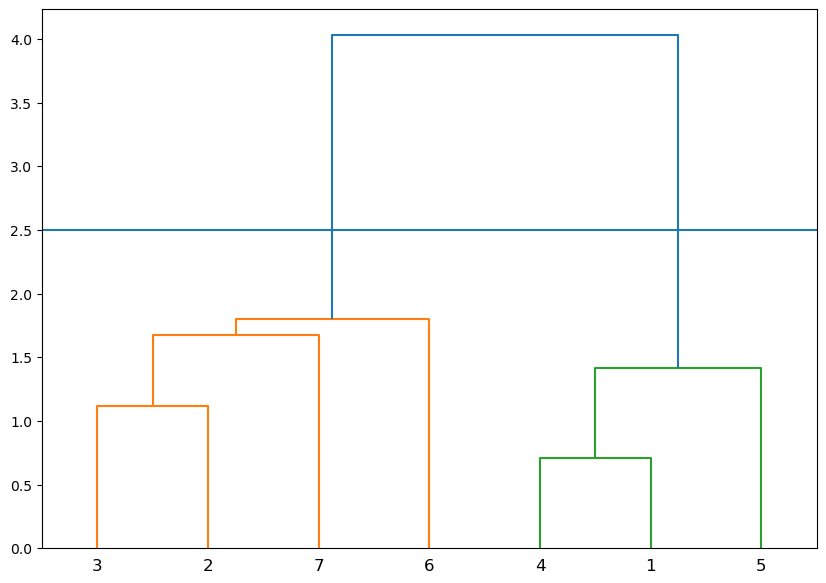

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(data, 'single')
labellist = range(1,8)

plt.figure(figsize=(10,7))
dendrogram(linked,
          orientation='top',
          labels=labellist,
          distance_sort='descending',
          show_leaf_counts=True)
plt.axhline(y=2.5)
plt.show()

In [27]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

k = 2
Hclustering = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='single')
Hclustering.fit(data)


AgglomerativeClustering(linkage='single', metric='euclidean')

In [28]:
Hclustering.fit_predict(data)


array([1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [29]:
print(Hclustering.labels_)

[1 0 0 1 1 0 0]


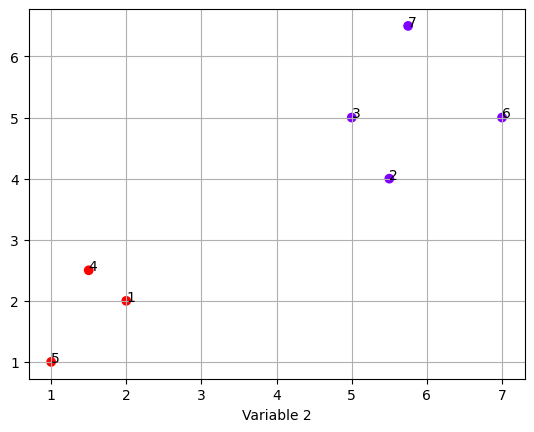

In [30]:
x = data['Variable 1']
y = data['Variable 2']
n = range(1,8)

fig, ax = plt.subplots()
ax.scatter(x,y, c=Hclustering.labels_, cmap='rainbow')
plt.grid()
plt.xlabel("Variable 1")
plt.xlabel("Variable 2")
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))